In [1]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
import json

### Part 1 - Data Gathering using APIs

Ques 1. A dataset containing details about Metro Nashville Police Department reported incidents is available at https://data.nashville.gov/Police/Metro-Nashville-Police-Department-Incidents/2u6v-ujjs. Make use of the API to find all aggravated burglary incidents () that were reported during the nine month period from January 1, 2022 through September 30, 2021. (Hint: Check out the API Docs to see how to narrow down the response to just the desired results).

In [2]:
endpoint = 'https://data.nashville.gov/resource/2u6v-ujjs.json'
params = { '$where': "incident_reported between '2022-01-01' and '2022-09-30'",
           'offense_description' : 'BURGLARY- AGGRAVATED',
           '$limit': 2000
         }
response = requests.get(endpoint, params = params)

In [3]:
response

<Response [200]>

In [4]:
response.text

'[{"primary_key":"20220167824_11","incident_number":"20220167824","report_type":"D","report_type_description":"DISPATCHED","incident_status_code":"O","incident_status_description":"OPEN","investigation_status":"Open","incident_occurred":"2022-04-07T15:00:00.000","incident_reported":"2022-04-08T11:52:00.000","incident_location":"JACKSON ST","latitude":"36.17","longitude":"-86.8","location_code":"22","location_description":"RESIDENCE, HOME","offense_number":"1","offense_nibrs":"220","offense_description":"BURGLARY- AGGRAVATED","weapon_primary":"16","weapon_description":"Unarmed","victim_number":"1","domestic_related":false,"victim_type":"I","victim_description":"INDIVIDUAL (18 AND OVER)","victim_gender":"U","victim_race":"W","victim_ethnicity":"Non-Hispanic","victim_county_resident":"NON RESIDENT","mapped_location":{"type":"Point","coordinates":[-86.8,36.17]}}\n,{"primary_key":"20220126184_31","incident_number":"20220126184","report_type":"D","report_type_description":"DISPATCHED","incid

In [5]:
Nashville_res = response.json()
Nashville_res

[{'primary_key': '20220167824_11',
  'incident_number': '20220167824',
  'report_type': 'D',
  'report_type_description': 'DISPATCHED',
  'incident_status_code': 'O',
  'incident_status_description': 'OPEN',
  'investigation_status': 'Open',
  'incident_occurred': '2022-04-07T15:00:00.000',
  'incident_reported': '2022-04-08T11:52:00.000',
  'incident_location': 'JACKSON ST',
  'latitude': '36.17',
  'longitude': '-86.8',
  'location_code': '22',
  'location_description': 'RESIDENCE, HOME',
  'offense_number': '1',
  'offense_nibrs': '220',
  'offense_description': 'BURGLARY- AGGRAVATED',
  'weapon_primary': '16',
  'weapon_description': 'Unarmed',
  'victim_number': '1',
  'domestic_related': False,
  'victim_type': 'I',
  'victim_description': 'INDIVIDUAL (18 AND OVER)',
  'victim_gender': 'U',
  'victim_race': 'W',
  'victim_ethnicity': 'Non-Hispanic',
  'victim_county_resident': 'NON RESIDENT',
  'mapped_location': {'type': 'Point', 'coordinates': [-86.8, 36.17]}},
 {'primary_key':

In [6]:
Nashville_BUR_AGG=pd.DataFrame(Nashville_res)
Nashville_BUR_AGG

,primary_key,incident_number,report_type,report_type_description,incident_status_code,incident_status_description,investigation_status,incident_occurred,incident_reported,incident_location,...,victim_type,victim_description,victim_gender,victim_race,victim_ethnicity,victim_county_resident,mapped_location,rpa,zone,zip_code
0,20220167824_11,20220167824,D,DISPATCHED,O,OPEN,Open,2022-04-07T15:00:00.000,2022-04-08T11:52:00.000,JACKSON ST,...,I,INDIVIDUAL (18 AND OVER),U,W,Non-Hispanic,NON RESIDENT,"{'type': 'Point', 'coordinates': [-86.8, 36.17]}",NaN,NaN,NaN
1,20220126184_31,20220126184,D,DISPATCHED,O,OPEN,Open,2022-03-18T02:30:00.000,2022-03-18T06:51:00.000,BENTON AVE,...,I,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.77, 36.13]}",8029,817,NaN
2,20220027854_12,20220027854,D,DISPATCHED,O,OPEN,Open,2022-01-18T07:45:00.000,2022-01-19T23:48:00.000,CANE RIDGE RD,...,I,INDIVIDUAL (18 AND OVER),M,B,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.66, 36.04]}",NaN,NaN,NaN
3,20220032825_11,20220032825,D,DISPATCHED,O,OPEN,Open,2022-01-23T00:40:00.000,2022-01-24T06:57:00.000,BROOKWOOD TER,...,I,INDIVIDUAL (18 AND OVER),F,W,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.86, 36.13]}",5019,121,NaN
4,20220010799_11,20220010799,D,DISPATCHED,O,OPEN,Open,2021-12-06T12:00:00.000,2022-01-21T16:25:00.000,SOUTH ST,...,I,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.78, 36.15]}",6805,815,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,20220417748_11,20220417748,D,DISPATCHED,O,OPEN,Open,2022-08-22T05:40:00.000,2022-08-22T21:24:00.000,PENN MEADE WAY,...,I,INDIVIDUAL (18 AND OVER),F,U,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.7, 36.24]}",NaN,NaN,NaN
1355,20220462314_11,20220462314,D,DISPATCHED,R,REFUSED TO COOPERATE,Closed,2022-09-13T17:00:00.000,2022-09-15T02:04:00.000,1524 1524,...,I,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.744, 36....",NaN,NaN,37206
1356,20220397543_11,20220397543,D,DISPATCHED,R,REFUSED TO COOPERATE,Closed,2022-08-11T18:00:00.000,2022-08-11T22:47:00.000,930 930,...,I,INDIVIDUAL (18 AND OVER),F,B,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.835, 36....",NaN,NaN,37209
1357,20220487005_11,20220487005,D,DISPATCHED,R,REFUSED TO COOPERATE,Closed,2022-09-27T19:16:00.000,2022-09-27T22:46:00.000,400 400,...,I,INDIVIDUAL (18 AND OVER),F,B,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.794, 36....",NaN,NaN,37207


In [7]:
Nashville_BUR_AGG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   primary_key                  1359 non-null   object
 1   incident_number              1359 non-null   object
 2   report_type                  1359 non-null   object
 3   report_type_description      1348 non-null   object
 4   incident_status_code         1359 non-null   object
 5   incident_status_description  1359 non-null   object
 6   investigation_status         1359 non-null   object
 7   incident_occurred            1359 non-null   object
 8   incident_reported            1359 non-null   object
 9   incident_location            1351 non-null   object
 10  latitude                     1352 non-null   object
 11  longitude                    1352 non-null   object
 12  location_code                1359 non-null   object
 13  location_description         1359

In [9]:
Nashville_BUR_AGG.shape

(1359, 31)

In [ ]:
#url = "https://data.nashville.gov/resource/2u6v-ujjs.json?$where=incident_reported between '2022-01-01' and '2022-09-30' AND offense_description='BURGLARY- AGGRAVATED'&$limit=2000"
#response= requests.get(url)
#data = response.json()
#df1 = pd.DataFrame.from_records(data)
#df1

Ques 2. Using the 2020 American Community Survey API, obtain, for each census tract, the population (B01001_001E in the detailed tables) and the median income (S1901_C01_012E in the subject tables). Hint: Tennessee's FIPS code is 47 and Davidson County's FIPS code is 37.

In [ ]:
with open('2020keys.json') as fi:
    credentials = json.load(fi)

In [ ]:
api_key = credentials['api_key']

In [10]:
endpointx= 'https://api.census.gov/data/2020/acs/acs5?get=NAME,B01001_001E&for=tract:*&in=state:47&in=county:037&key=3a2e429d237f872aa3e2e39bc038ee65608e6090'


In [ ]:
#paramsx = { 'api_key' : api_key}

In [ ]:
#Pop_response = requests.get(endpointx, params = paramsx)

In [11]:
Pop_response = requests.get(endpointx)

In [12]:
Pop_response.text

'[["NAME","B01001_001E","state","county","tract"],\n["Census Tract 190.04, Davidson County, Tennessee","4470","47","037","019004"],\n["Census Tract 190.07, Davidson County, Tennessee","2904","47","037","019007"],\n["Census Tract 190.08, Davidson County, Tennessee","6005","47","037","019008"],\n["Census Tract 191.05, Davidson County, Tennessee","5707","47","037","019105"],\n["Census Tract 191.06, Davidson County, Tennessee","4336","47","037","019106"],\n["Census Tract 191.08, Davidson County, Tennessee","3478","47","037","019108"],\n["Census Tract 191.09, Davidson County, Tennessee","5347","47","037","019109"],\n["Census Tract 191.10, Davidson County, Tennessee","3604","47","037","019110"],\n["Census Tract 191.11, Davidson County, Tennessee","4715","47","037","019111"],\n["Census Tract 191.12, Davidson County, Tennessee","5013","47","037","019112"],\n["Census Tract 191.15, Davidson County, Tennessee","3661","47","037","019115"],\n["Census Tract 191.16, Davidson County, Tennessee","7353"

In [13]:
Pop_response

<Response [200]>

In [14]:
Pop_response.json()

[['NAME', 'B01001_001E', 'state', 'county', 'tract'],
 ['Census Tract 190.04, Davidson County, Tennessee',
  '4470',
  '47',
  '037',
  '019004'],
 ['Census Tract 190.07, Davidson County, Tennessee',
  '2904',
  '47',
  '037',
  '019007'],
 ['Census Tract 190.08, Davidson County, Tennessee',
  '6005',
  '47',
  '037',
  '019008'],
 ['Census Tract 191.05, Davidson County, Tennessee',
  '5707',
  '47',
  '037',
  '019105'],
 ['Census Tract 191.06, Davidson County, Tennessee',
  '4336',
  '47',
  '037',
  '019106'],
 ['Census Tract 191.08, Davidson County, Tennessee',
  '3478',
  '47',
  '037',
  '019108'],
 ['Census Tract 191.09, Davidson County, Tennessee',
  '5347',
  '47',
  '037',
  '019109'],
 ['Census Tract 191.10, Davidson County, Tennessee',
  '3604',
  '47',
  '037',
  '019110'],
 ['Census Tract 191.11, Davidson County, Tennessee',
  '4715',
  '47',
  '037',
  '019111'],
 ['Census Tract 191.12, Davidson County, Tennessee',
  '5013',
  '47',
  '037',
  '019112'],
 ['Census Tract 

In [15]:
Population = pd.DataFrame(Pop_response.json())
Population


,0,1,2,3,4
0,NAME,B01001_001E,state,county,tract
1,"Census Tract 190.04, Davidson County, Tennessee",4470,47,037,019004
2,"Census Tract 190.07, Davidson County, Tennessee",2904,47,037,019007
3,"Census Tract 190.08, Davidson County, Tennessee",6005,47,037,019008
4,"Census Tract 191.05, Davidson County, Tennessee",5707,47,037,019105
...,...,...,...,...,...
170,"Census Tract 189.01, Davidson County, Tennessee",3280,47,037,018901
171,"Census Tract 189.02, Davidson County, Tennessee",2704,47,037,018902
172,"Census Tract 189.04, Davidson County, Tennessee",3410,47,037,018904
173,"Census Tract 189.05, Davidson County, Tennessee",3292,47,037,018905


In [16]:
endpointy = 'https://api.census.gov/data/2020/acs/acs5/subject?get=NAME,S0101_C01_012E&for=tract:*&in=state:47&in=county:037&key=3a2e429d237f872aa3e2e39bc038ee65608e6090'


In [17]:
Sub_response = requests.get(endpointy)

In [18]:
Sub_response

<Response [200]>

In [19]:
Sub_response.json()

[['NAME', 'S0101_C01_012E', 'state', 'county', 'tract'],
 ['Census Tract 190.04, Davidson County, Tennessee',
  '239',
  '47',
  '037',
  '019004'],
 ['Census Tract 190.07, Davidson County, Tennessee',
  '139',
  '47',
  '037',
  '019007'],
 ['Census Tract 190.08, Davidson County, Tennessee',
  '288',
  '47',
  '037',
  '019008'],
 ['Census Tract 191.05, Davidson County, Tennessee',
  '252',
  '47',
  '037',
  '019105'],
 ['Census Tract 191.06, Davidson County, Tennessee',
  '244',
  '47',
  '037',
  '019106'],
 ['Census Tract 191.08, Davidson County, Tennessee',
  '114',
  '47',
  '037',
  '019108'],
 ['Census Tract 191.09, Davidson County, Tennessee',
  '298',
  '47',
  '037',
  '019109'],
 ['Census Tract 191.10, Davidson County, Tennessee',
  '131',
  '47',
  '037',
  '019110'],
 ['Census Tract 191.11, Davidson County, Tennessee',
  '325',
  '47',
  '037',
  '019111'],
 ['Census Tract 191.12, Davidson County, Tennessee',
  '341',
  '47',
  '037',
  '019112'],
 ['Census Tract 191.15,

In [20]:
Subject = pd.DataFrame(Sub_response.json())
Subject

,0,1,2,3,4
0,NAME,S0101_C01_012E,state,county,tract
1,"Census Tract 190.04, Davidson County, Tennessee",239,47,037,019004
2,"Census Tract 190.07, Davidson County, Tennessee",139,47,037,019007
3,"Census Tract 190.08, Davidson County, Tennessee",288,47,037,019008
4,"Census Tract 191.05, Davidson County, Tennessee",252,47,037,019105
...,...,...,...,...,...
170,"Census Tract 189.01, Davidson County, Tennessee",75,47,037,018901
171,"Census Tract 189.02, Davidson County, Tennessee",155,47,037,018902
172,"Census Tract 189.04, Davidson County, Tennessee",79,47,037,018904
173,"Census Tract 189.05, Davidson County, Tennessee",114,47,037,018905


In [21]:

import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [33]:
Shapefile = gpd.read_file('../tl_2020_47_tract')
Shapefile.head( )

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,47,175,925200,47175925200,9252,Census Tract 9252,G5020,S,227429512,1667739,+35.7438100,-085.4940227,"POLYGON ((-85.61516 35.76106, -85.61509 35.761..."
1,47,175,925000,47175925000,9250,Census Tract 9250,G5020,S,480712883,1225717,+35.6695378,-085.4220628,"POLYGON ((-85.60513 35.70854, -85.60511 35.708..."
2,47,003,950201,47003950201,9502.01,Census Tract 9502.01,G5020,S,121774227,0,+35.6517480,-086.5575518,"POLYGON ((-86.64406 35.64029, -86.64375 35.642..."
3,47,003,950202,47003950202,9502.02,Census Tract 9502.02,G5020,S,110617191,700793,+35.5845755,-086.5790796,"POLYGON ((-86.66377 35.58189, -86.66367 35.582..."
4,47,093,003300,47093003300,33,Census Tract 33,G5020,S,5860088,229299,+36.0020586,-083.8371218,"POLYGON ((-83.86208 35.99255, -83.86207 35.992..."


In [34]:
Shapefile.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1701 entries, 0 to 1700
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATEFP   1701 non-null   object  
 1   COUNTYFP  1701 non-null   object  
 2   TRACTCE   1701 non-null   object  
 3   GEOID     1701 non-null   object  
 4   NAME      1701 non-null   object  
 5   NAMELSAD  1701 non-null   object  
 6   MTFCC     1701 non-null   object  
 7   FUNCSTAT  1701 non-null   object  
 8   ALAND     1701 non-null   int64   
 9   AWATER    1701 non-null   int64   
 10  INTPTLAT  1701 non-null   object  
 11  INTPTLON  1701 non-null   object  
 12  geometry  1701 non-null   geometry
dtypes: geometry(1), int64(2), object(10)
memory usage: 172.9+ KB


In [35]:
type(Shapefile)

geopandas.geodataframe.GeoDataFrame

In [36]:
Shapefile.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

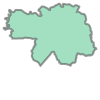

In [37]:
Shapefile.loc[0, 'geometry']

In [44]:
print(Shapefile.loc[0, 'geometry'])

POLYGON ((-85.615164 35.761064, -85.615089 35.761269, -85.61496799999999 35.761458999999995, -85.614898 35.761531, -85.614865 35.761554, -85.614824 35.761568, -85.614738 35.761587999999996, -85.614694 35.761593999999995, -85.614605 35.761599, -85.614561 35.761595, -85.614176 35.761506, -85.613924 35.761434, -85.61346999999999 35.761288, -85.612935 35.761109999999995, -85.612163 35.76094, -85.611899 35.760903, -85.61140999999999 35.760878, -85.61127599999999 35.760878, -85.610534 35.760934, -85.610433 35.760942, -85.610034 35.760979999999996, -85.609116 35.761126, -85.60902999999999 35.761143, -85.608817 35.761195, -85.608485 35.761299, -85.60786999999999 35.761508, -85.60742599999999 35.761674, -85.606893 35.761856, -85.6061 35.762181999999996, -85.60553999999999 35.762401, -85.605075 35.762613, -85.604734 35.762781, -85.604475 35.76292, -85.60423899999999 35.763020999999995, -85.60395 35.763116, -85.603613 35.763207, -85.603532 35.763238, -85.603298 35.763341, -85.603188 35.763402, -8

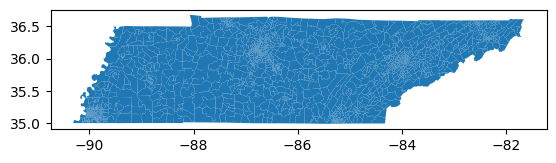

In [41]:
Shapefile.plot();

In [43]:
Nashville_BUR_AGG.head(2)

,primary_key,incident_number,report_type,report_type_description,incident_status_code,incident_status_description,investigation_status,incident_occurred,incident_reported,incident_location,...,victim_type,victim_description,victim_gender,victim_race,victim_ethnicity,victim_county_resident,mapped_location,rpa,zone,zip_code
0,20220167824_11,20220167824,D,DISPATCHED,O,OPEN,Open,2022-04-07T15:00:00.000,2022-04-08T11:52:00.000,JACKSON ST,...,I,INDIVIDUAL (18 AND OVER),U,W,Non-Hispanic,NON RESIDENT,"{'type': 'Point', 'coordinates': [-86.8, 36.17]}",NaN,NaN,NaN
1,20220126184_31,20220126184,D,DISPATCHED,O,OPEN,Open,2022-03-18T02:30:00.000,2022-03-18T06:51:00.000,BENTON AVE,...,I,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.77, 36.13]}",8029,817,NaN


In [88]:
Nashville_BUR_AGG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   primary_key                  1359 non-null   object
 1   incident_number              1359 non-null   object
 2   report_type                  1359 non-null   object
 3   report_type_description      1348 non-null   object
 4   incident_status_code         1359 non-null   object
 5   incident_status_description  1359 non-null   object
 6   investigation_status         1359 non-null   object
 7   incident_occurred            1359 non-null   object
 8   incident_reported            1359 non-null   object
 9   incident_location            1351 non-null   object
 10  latitude                     1352 non-null   object
 11  longitude                    1352 non-null   object
 12  location_code                1359 non-null   object
 13  location_description         1359

In [102]:
from shapely.geometry import Point
import shapely

In [103]:
Nashville_BUR_AGG['geometry'] = gpd.points_from_xy(Nashville_BUR_AGG['longitude'], Nashville_BUR_AGG['latitude'])

Nashville_BUR_AGG.head(10)

,primary_key,incident_number,report_type,report_type_description,incident_status_code,incident_status_description,investigation_status,incident_occurred,incident_reported,incident_location,...,victim_race,victim_ethnicity,victim_county_resident,mapped_location,rpa,zone,zip_code,lat,"(lng, lat)",geometry
0,20220167824_11,20220167824,D,DISPATCHED,O,OPEN,Open,2022-04-07T15:00:00.000,2022-04-08T11:52:00.000,JACKSON ST,...,W,Non-Hispanic,NON RESIDENT,"{'type': 'Point', 'coordinates': [-86.8, 36.17]}",NaN,NaN,NaN,"{'type': 'Point', 'coordinates': [-86.8, 36.17]}","{'type': 'Point', 'coordinates': [-86.8, 36.17]}",POINT (-86.80000 36.17000)
1,20220126184_31,20220126184,D,DISPATCHED,O,OPEN,Open,2022-03-18T02:30:00.000,2022-03-18T06:51:00.000,BENTON AVE,...,W,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.77, 36.13]}",8029,817,NaN,"{'type': 'Point', 'coordinates': [-86.77, 36.13]}","{'type': 'Point', 'coordinates': [-86.77, 36.13]}",POINT (-86.77000 36.13000)
2,20220027854_12,20220027854,D,DISPATCHED,O,OPEN,Open,2022-01-18T07:45:00.000,2022-01-19T23:48:00.000,CANE RIDGE RD,...,B,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.66, 36.04]}",NaN,NaN,NaN,"{'type': 'Point', 'coordinates': [-86.66, 36.04]}","{'type': 'Point', 'coordinates': [-86.66, 36.04]}",POINT (-86.66000 36.04000)
3,20220032825_11,20220032825,D,DISPATCHED,O,OPEN,Open,2022-01-23T00:40:00.000,2022-01-24T06:57:00.000,BROOKWOOD TER,...,W,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.86, 36.13]}",5019,121,NaN,"{'type': 'Point', 'coordinates': [-86.86, 36.13]}","{'type': 'Point', 'coordinates': [-86.86, 36.13]}",POINT (-86.86000 36.13000)
4,20220010799_11,20220010799,D,DISPATCHED,O,OPEN,Open,2021-12-06T12:00:00.000,2022-01-21T16:25:00.000,SOUTH ST,...,W,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.78, 36.15]}",6805,815,NaN,"{'type': 'Point', 'coordinates': [-86.78, 36.15]}","{'type': 'Point', 'coordinates': [-86.78, 36.15]}",POINT (-86.78000 36.15000)
5,20220023736_11,20220023736,D,DISPATCHED,O,OPEN,Open,2022-01-15T10:00:00.000,2022-01-17T11:25:00.000,WEDGEWOOD AVE,...,NaN,NaN,NaN,"{'type': 'Point', 'coordinates': [-86.77, 36.13]}",8025,817,NaN,"{'type': 'Point', 'coordinates': [-86.77, 36.13]}","{'type': 'Point', 'coordinates': [-86.77, 36.13]}",POINT (-86.77000 36.13000)
6,20220027854_11,20220027854,D,DISPATCHED,O,OPEN,Open,2022-01-18T07:45:00.000,2022-01-19T23:48:00.000,CANE RIDGE RD,...,W,Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.66, 36.04]}",NaN,NaN,NaN,"{'type': 'Point', 'coordinates': [-86.66, 36.04]}","{'type': 'Point', 'coordinates': [-86.66, 36.04]}",POINT (-86.66000 36.04000)
7,20220026903_11,20220026903,D,DISPATCHED,O,OPEN,Open,2022-01-19T10:32:00.000,2022-01-19T12:10:00.000,MANCHESTER AVE,...,B,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.84, 36.19]}",3119,625,NaN,"{'type': 'Point', 'coordinates': [-86.84, 36.19]}","{'type': 'Point', 'coordinates': [-86.84, 36.19]}",POINT (-86.84000 36.19000)
8,20220033261_21,20220033261,D,DISPATCHED,O,OPEN,Open,2022-01-22T13:00:00.000,2022-01-23T15:07:00.000,OLD FRANKLIN RD,...,W,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.65, 36.03]}",NaN,NaN,NaN,"{'type': 'Point', 'coordinates': [-86.65, 36.03]}","{'type': 'Point', 'coordinates': [-86.65, 36.03]}",POINT (-86.65000 36.03000)
9,20220014397_11,20220014397,D,DISPATCHED,O,OPEN,Open,2022-01-10T01:00:00.000,2022-01-11T09:15:00.000,BAKERTOWN RD,...,W,Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.69, 36.07]}",NaN,NaN,NaN,"{'type': 'Point', 'coordinates': [-86.69, 36.07]}","{'type': 'Point', 'coordinates': [-86.69, 36.07]}",POINT (-86.69000 36.07000)


In [109]:
Geo_Nashville_BUR_AGG = gpd.GeoDataFrame(Nashville_BUR_AGG, 
                           crs = Shapefile.crs, 
                           geometry = Nashville_BUR_AGG['geometry'])
Geo_Nashville_BUR_AGG

,primary_key,incident_number,report_type,report_type_description,incident_status_code,incident_status_description,investigation_status,incident_occurred,incident_reported,incident_location,...,victim_race,victim_ethnicity,victim_county_resident,mapped_location,rpa,zone,zip_code,lat,"(lng, lat)",geometry
0,20220167824_11,20220167824,D,DISPATCHED,O,OPEN,Open,2022-04-07T15:00:00.000,2022-04-08T11:52:00.000,JACKSON ST,...,W,Non-Hispanic,NON RESIDENT,"{'type': 'Point', 'coordinates': [-86.8, 36.17]}",NaN,NaN,NaN,"{'type': 'Point', 'coordinates': [-86.8, 36.17]}","{'type': 'Point', 'coordinates': [-86.8, 36.17]}",POINT (-86.80000 36.17000)
1,20220126184_31,20220126184,D,DISPATCHED,O,OPEN,Open,2022-03-18T02:30:00.000,2022-03-18T06:51:00.000,BENTON AVE,...,W,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.77, 36.13]}",8029,817,NaN,"{'type': 'Point', 'coordinates': [-86.77, 36.13]}","{'type': 'Point', 'coordinates': [-86.77, 36.13]}",POINT (-86.77000 36.13000)
2,20220027854_12,20220027854,D,DISPATCHED,O,OPEN,Open,2022-01-18T07:45:00.000,2022-01-19T23:48:00.000,CANE RIDGE RD,...,B,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.66, 36.04]}",NaN,NaN,NaN,"{'type': 'Point', 'coordinates': [-86.66, 36.04]}","{'type': 'Point', 'coordinates': [-86.66, 36.04]}",POINT (-86.66000 36.04000)
3,20220032825_11,20220032825,D,DISPATCHED,O,OPEN,Open,2022-01-23T00:40:00.000,2022-01-24T06:57:00.000,BROOKWOOD TER,...,W,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.86, 36.13]}",5019,121,NaN,"{'type': 'Point', 'coordinates': [-86.86, 36.13]}","{'type': 'Point', 'coordinates': [-86.86, 36.13]}",POINT (-86.86000 36.13000)
4,20220010799_11,20220010799,D,DISPATCHED,O,OPEN,Open,2021-12-06T12:00:00.000,2022-01-21T16:25:00.000,SOUTH ST,...,W,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.78, 36.15]}",6805,815,NaN,"{'type': 'Point', 'coordinates': [-86.78, 36.15]}","{'type': 'Point', 'coordinates': [-86.78, 36.15]}",POINT (-86.78000 36.15000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,20220417748_11,20220417748,D,DISPATCHED,O,OPEN,Open,2022-08-22T05:40:00.000,2022-08-22T21:24:00.000,PENN MEADE WAY,...,U,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.7, 36.24]}",NaN,NaN,NaN,"{'type': 'Point', 'coordinates': [-86.7, 36.24]}","{'type': 'Point', 'coordinates': [-86.7, 36.24]}",POINT (-86.70000 36.24000)
1355,20220462314_11,20220462314,D,DISPATCHED,R,REFUSED TO COOPERATE,Closed,2022-09-13T17:00:00.000,2022-09-15T02:04:00.000,1524 1524,...,W,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.744, 36....",NaN,NaN,37206,"{'type': 'Point', 'coordinates': [-86.744, 36....","{'type': 'Point', 'coordinates': [-86.744, 36....",POINT (-86.74400 36.19400)
1356,20220397543_11,20220397543,D,DISPATCHED,R,REFUSED TO COOPERATE,Closed,2022-08-11T18:00:00.000,2022-08-11T22:47:00.000,930 930,...,B,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.835, 36....",NaN,NaN,37209,"{'type': 'Point', 'coordinates': [-86.835, 36....","{'type': 'Point', 'coordinates': [-86.835, 36....",POINT (-86.83500 36.16000)
1357,20220487005_11,20220487005,D,DISPATCHED,R,REFUSED TO COOPERATE,Closed,2022-09-27T19:16:00.000,2022-09-27T22:46:00.000,400 400,...,B,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.794, 36....",NaN,NaN,37207,"{'type': 'Point', 'coordinates': [-86.794, 36....","{'type': 'Point', 'coordinates': [-86.794, 36....",POINT (-86.79400 36.21400)


In [108]:
type(Geo_Nashville_BUR_AGG)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot: >

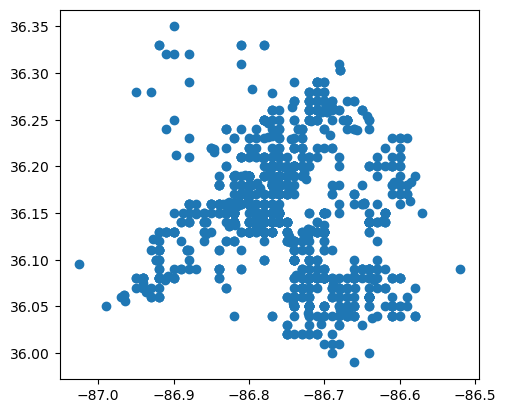

In [110]:
Geo_Nashville_BUR_AGG.plot()

In [ ]:
(36.236249, -86.816722)

In [ ]:
{'type': 'Point', 'coordinates': [-86.8, 36.17]}

In [101]:
Nashville_BUR_AGG['lng', 'lat'] =  Nashville_BUR_AGG['mapped_location'].replace("{'type': 'Point', 'coordinates':", "")
    #.str.replace("{'type': 'Point', 'coordinates':",'')
   #.str.strip('[]').str.split(',').astype(str)


In [98]:
txt = "{'type': 'Point', 'coordinates': [-86.8, 36.17]}"
txt= txt.replace("{'type': 'Point', 'coordinates':", "")
txt = txt.replace("[","").replace("]","").replace("}","")
txt = txt.split(",")
print(txt)

[' -86.8', ' 36.17']
